In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

Feature coefficients:
Bald: -1.2632
Big_Lips: -0.0115
Big_Nose: -0.2772
Black_Hair: 0.1222
Blond_Hair: 0.2078
Brown_Hair: 0.3279
Chubby: -1.8687
Double_Chin: -0.9540
Eyeglasses: -1.1990
Goatee: -0.1970
Gray_Hair: -1.4311
Heavy_Makeup: 1.4144
High_Cheekbones: 0.3357
Male: -0.1620
Mustache: -0.2084
Narrow_Eyes: -0.4219
No_Beard: -0.1931
Oval_Face: 0.5552
Pale_Skin: 0.8839
Pointy_Nose: 0.5691
Receding_Hairline: -0.8623
Rosy_Cheeks: 0.2633
Sideburns: 0.3800
Straight_Hair: 0.4262
Wavy_Hair: 0.3916
Young: 1.5701


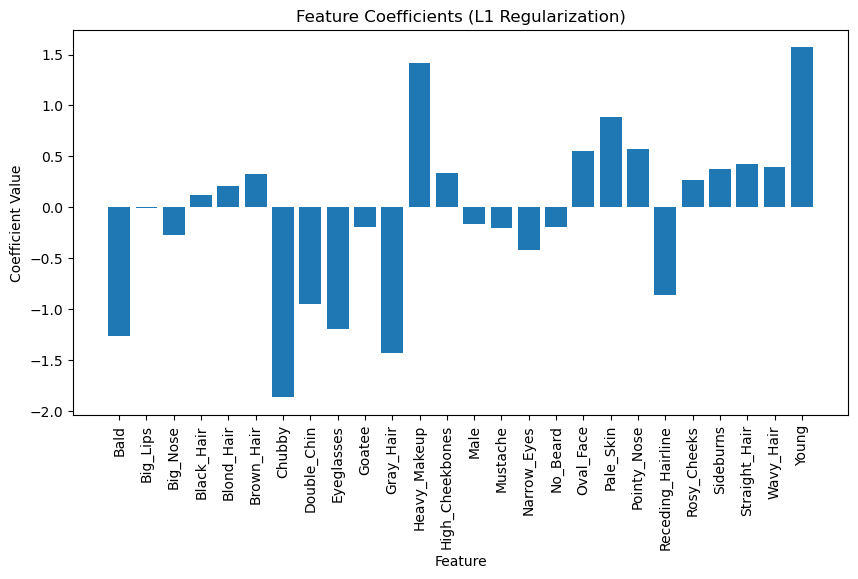

In [2]:
# L1 Feature Selection
# About: How each feature contributes to the prediction of the target variable (+, -, 0)
#        Larger coefficients have a stronger impact on the target variable
# Pos Coeff: higher correlation between features and Attractive feature: higher probability feature is considered more attractive
# Neg Coeff: lower correlation between features and Attractive feature: lower probability feature is considered less attractive

# Load dataset
celeb_data = pd.read_csv('list_attr_celeba.csv')

# Replace -1 with 0
celeb_data.replace(-1, 0, inplace=True)

# Drop unnecessary columns
celeb_data.drop(columns=[
    'image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 
    'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open', 
    'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 
    'Wearing_Necktie'
], inplace=True)

# Define features (X) and target (y)
X = celeb_data.drop("Attractive", axis=1)
y = celeb_data["Attractive"]

# Apply L1 feature selection using Logistic Regression
logistic = LogisticRegression(penalty='l1', solver='liblinear', random_state=42, C=1.0)
logistic.fit(X, y)  # Make sure to fit the model

# Get coefficients
coefficients = logistic.coef_[0]

# Display coefficients
print("Feature coefficients:")
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

# Plot coefficients
plt.figure(figsize=(10, 5))
plt.bar(X.columns, coefficients)
plt.xticks(rotation=90)
plt.title("Feature Coefficients (L1 Regularization)")
plt.ylabel("Coefficient Value")
plt.xlabel("Feature")
plt.show()
